In [1]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

### Data Understanding and Prepration

In [2]:
# Load data from csv
house_data = pd.read_csv("train (2).csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Check all columns 
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
#get shape of dataframe
house_data.shape

(1460, 81)

In [5]:
#get model description of dataframe
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
#Drop columns with maximum missing values
house_data = house_data.drop(columns=['PoolQC','MiscFeature', 'Alley', 'Fence',])

In [9]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
#check unique values of FireplaceQu 
house_data.FireplaceQu.value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [11]:
#replace Nan values of FireplaceQu with NA i.e. No Fireplace 
house_data.FireplaceQu = house_data.FireplaceQu.fillna('NA')

In [12]:
#check missing values again
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [13]:
#check unique values of LotFrontage
house_data.LotFrontage.value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [14]:
#check median of LotFrontage
LotFrontage_median = house_data.LotFrontage.median()
LotFrontage_median

69.0

In [15]:
#impute missing values of LotFrontage with median because of some outliers
house_data.LotFrontage = house_data.LotFrontage.fillna(LotFrontage_median)

In [16]:
#impute missing values of MasVnrArea with median median because of some outliers
house_data.MasVnrArea = house_data.MasVnrArea.fillna(house_data.MasVnrArea.median())    

In [17]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
house_data.MasVnrType = house_data.MasVnrType.fillna('None')

In [18]:
#replace Nan values of BsmtQual with NA i.e. No Basement
house_data.BsmtQual = house_data.BsmtQual.fillna('NA')

In [19]:
#replace Nan values of BsmtCond with NA i.e. No Basement
house_data.BsmtCond = house_data.BsmtCond.fillna('NA')

In [20]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
house_data.BsmtExposure = house_data.BsmtExposure.fillna('No')

In [21]:
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
house_data.BsmtFinType1 = house_data.BsmtFinType1.fillna('NA')

In [22]:
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
house_data.BsmtFinType2 = house_data.BsmtFinType2.fillna('NA')

In [23]:
#impute missing values of Electrical with mode due to categorical column
house_data.Electrical = house_data.Electrical.fillna(house_data.Electrical.mode()[0])    

In [24]:
#replace Nan values of GarageType with NA i.e. No Garage
house_data.GarageType = house_data.GarageType.fillna('NA')

In [25]:
#replace Nan values of GarageYrBlt with 0 i.e. No Garage
house_data.GarageYrBlt = house_data.GarageYrBlt.fillna(0)

In [26]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageFinish = house_data.GarageFinish.fillna('NA')

In [27]:
#replace Nan values of GarageQual with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')

In [28]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')

In [29]:
#replace Nan values of GarageCond with NA i.e. No Garage
house_data.GarageCond = house_data.GarageCond.fillna('NA')

In [30]:
#check missing values again
house_data.isnull().sum()[house_data.isnull().sum()>0]

Series([], dtype: int64)

In [31]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
house_data['HouseAge'] = house_data.YrSold - house_data.YearBuilt

In [32]:
#Drop YrSold, YearBuilt after HouseAge
house_data=house_data.drop(columns=['YrSold', 'YearBuilt'])

In [33]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
house_data = house_data.astype(convert_dict)

# checking outliers

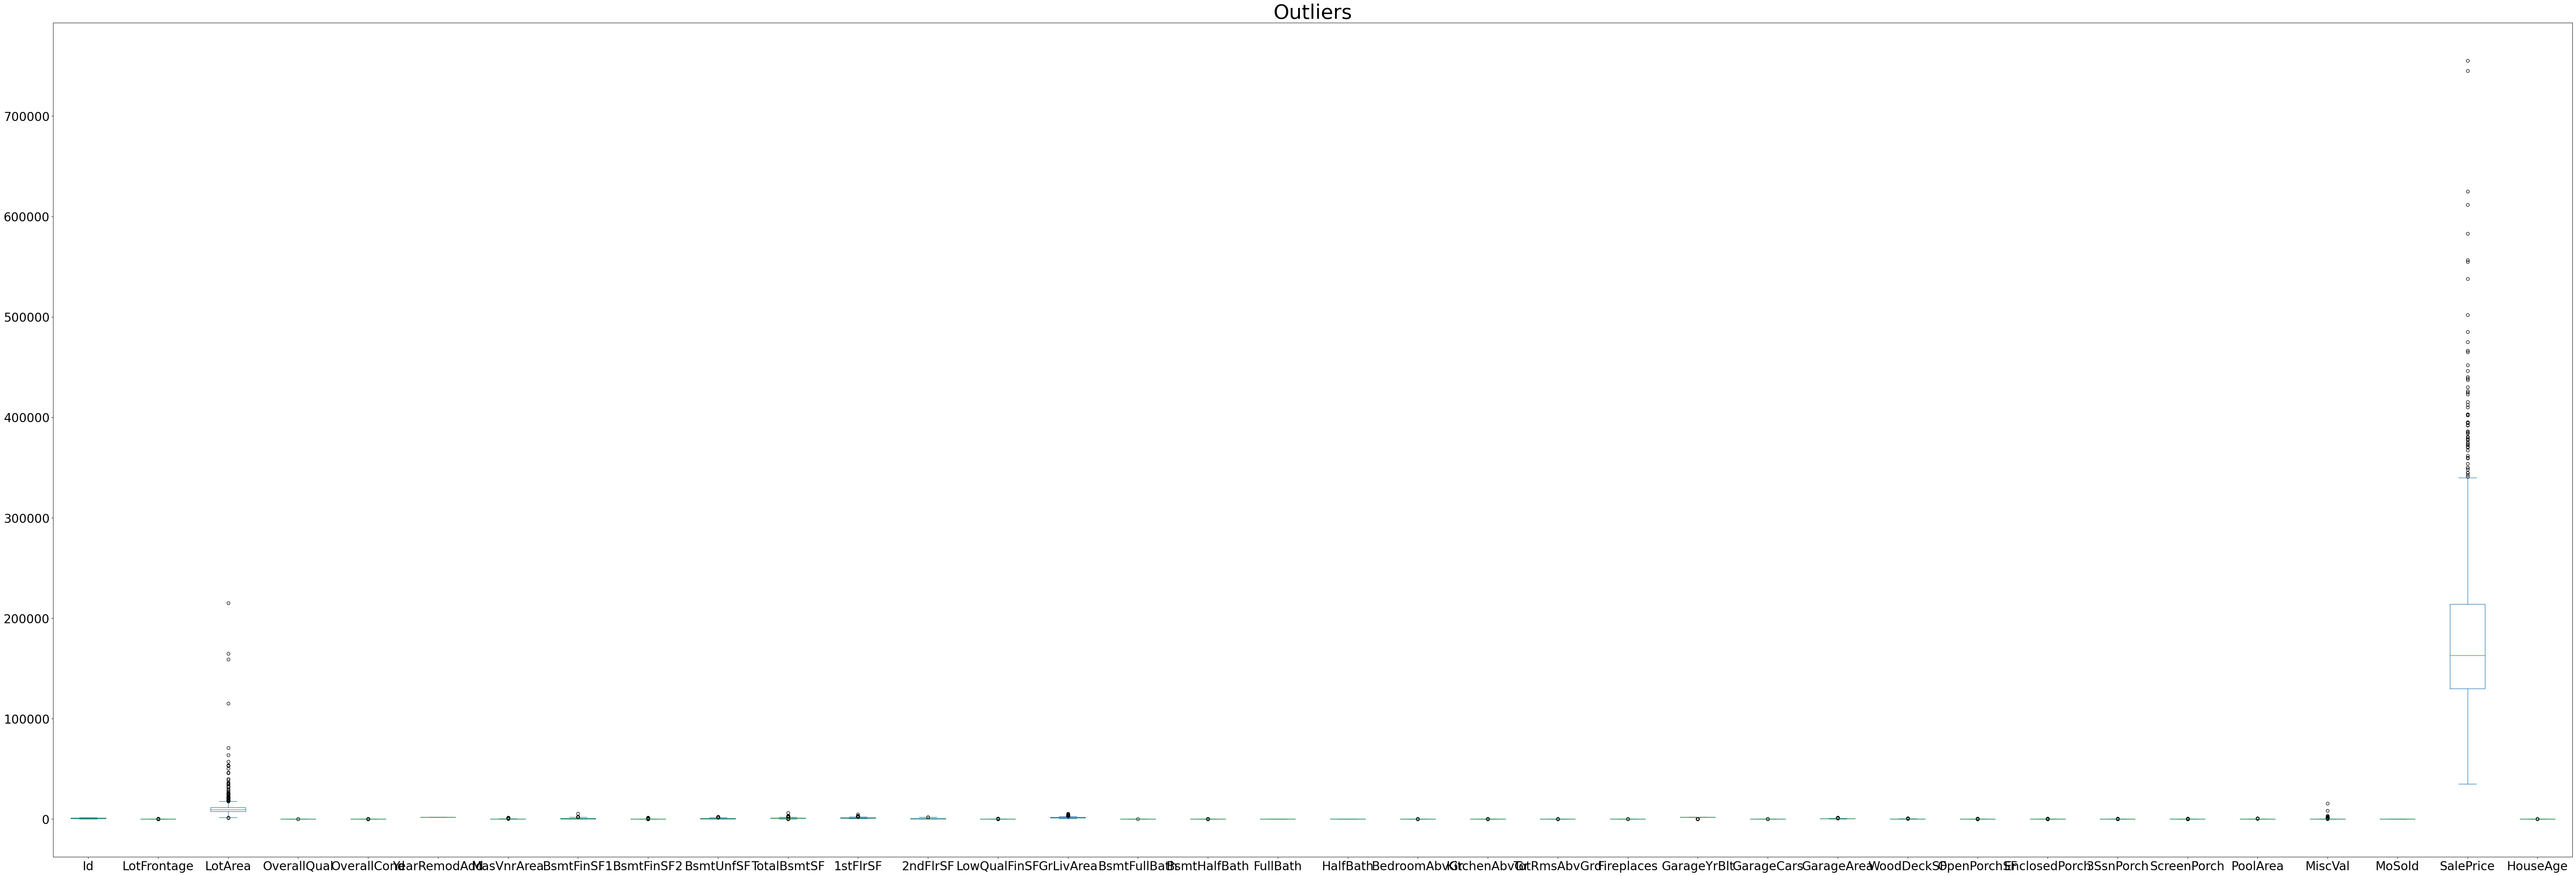

In [34]:
fig=house_data.plot.box(title='Outliers', figsize=(90, 30), legend=True, fontsize=24)
fig.axes.title.set_size(40)

 the column with the most variation and outliers is SalePrice. LotArea has also some outliers

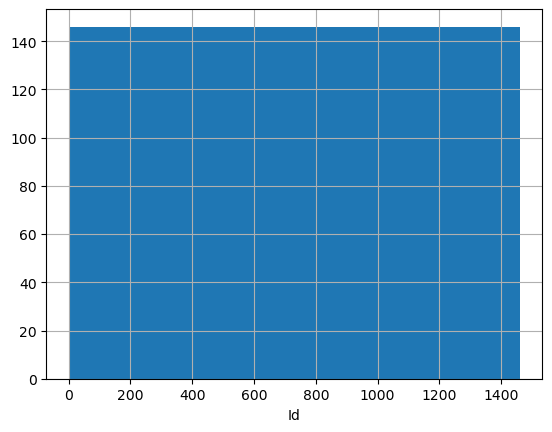

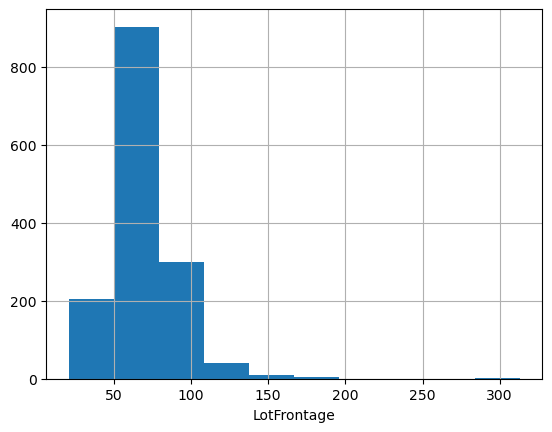

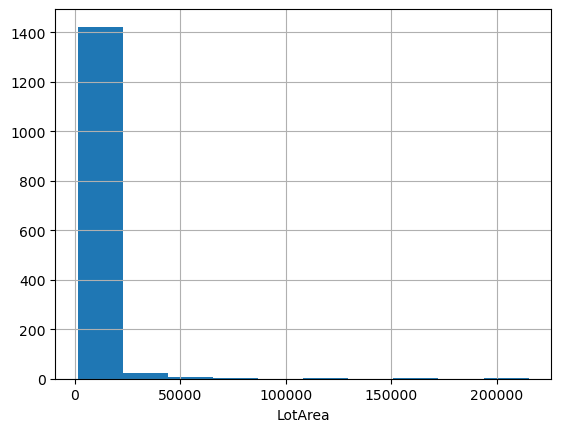

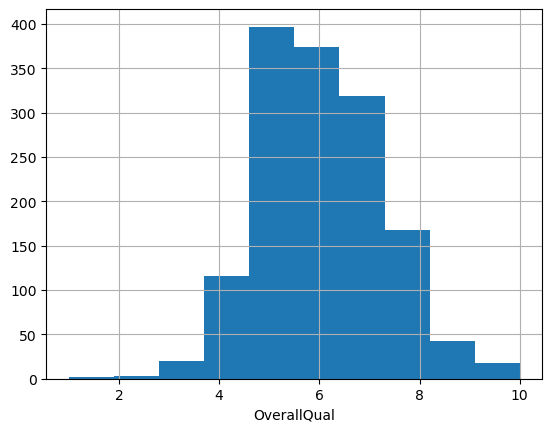

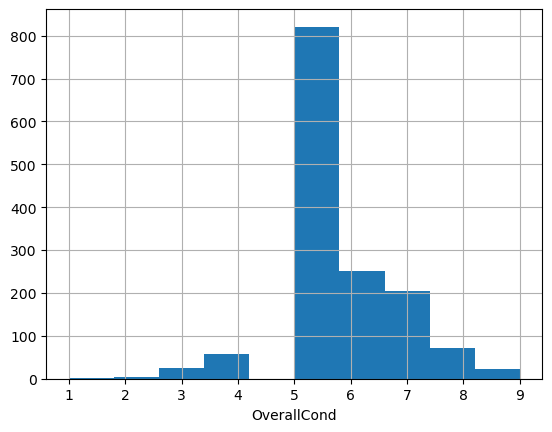

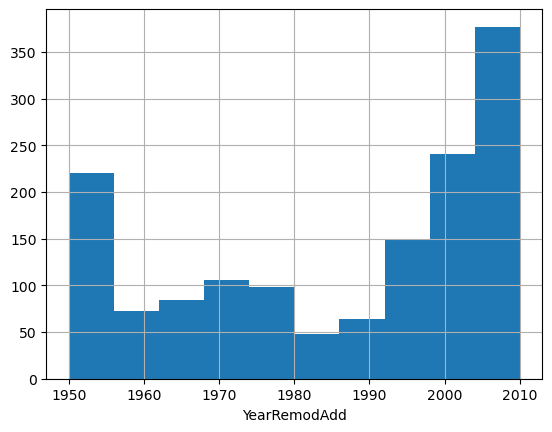

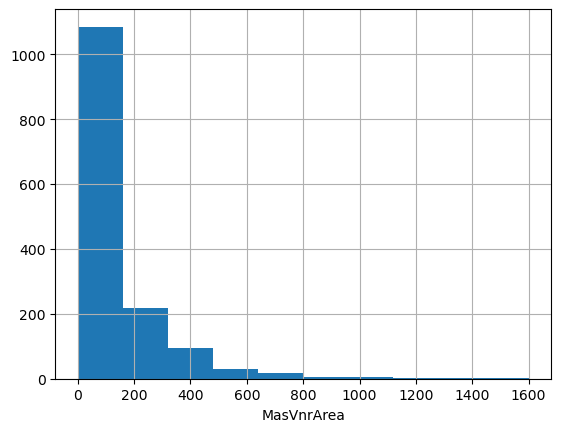

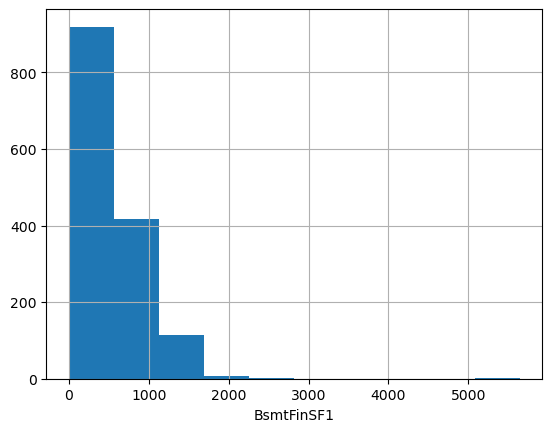

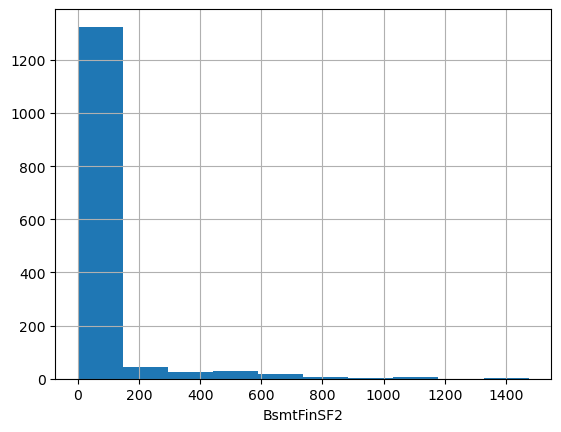

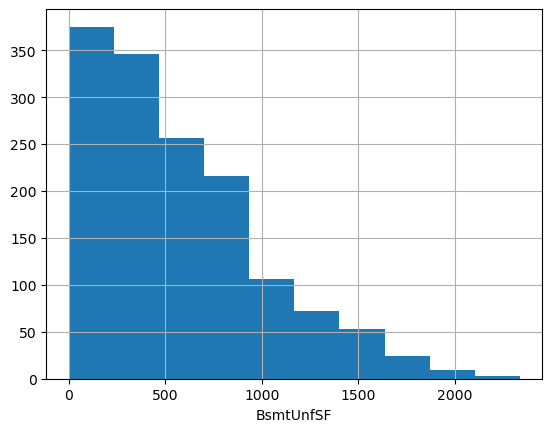

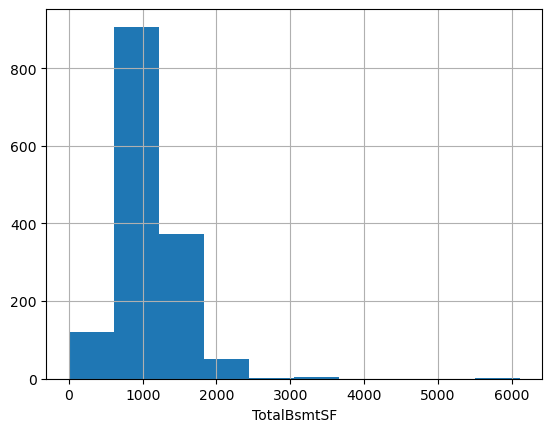

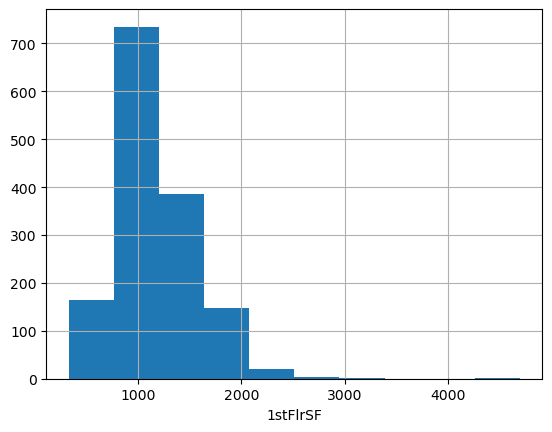

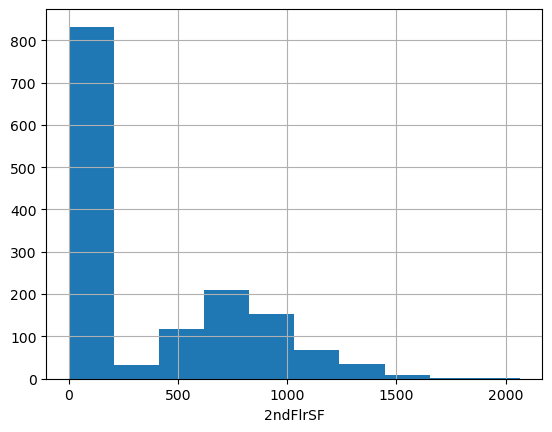

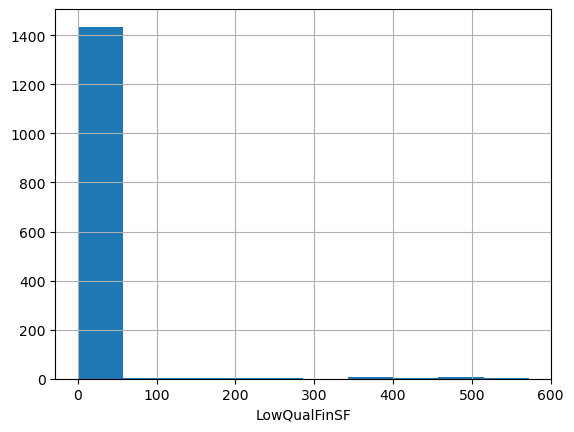

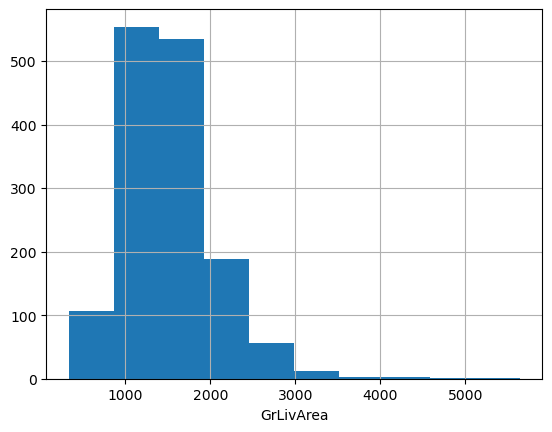

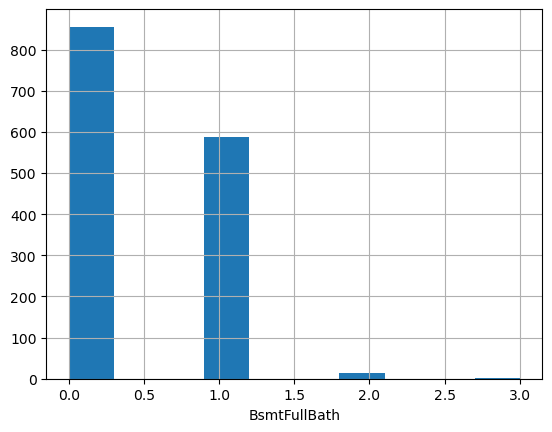

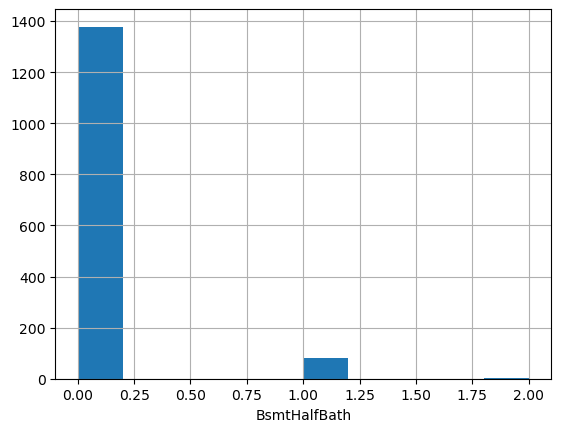

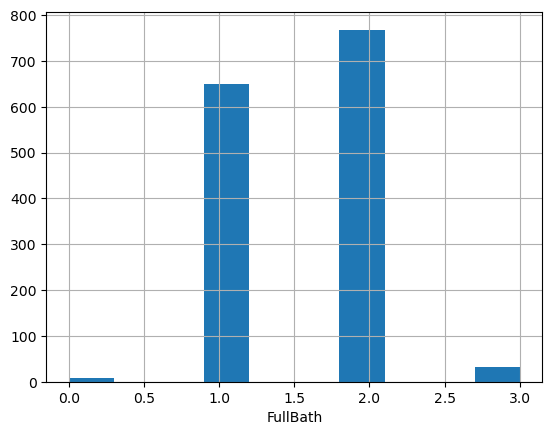

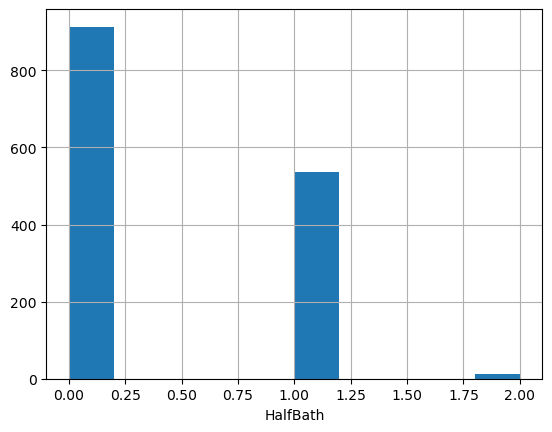

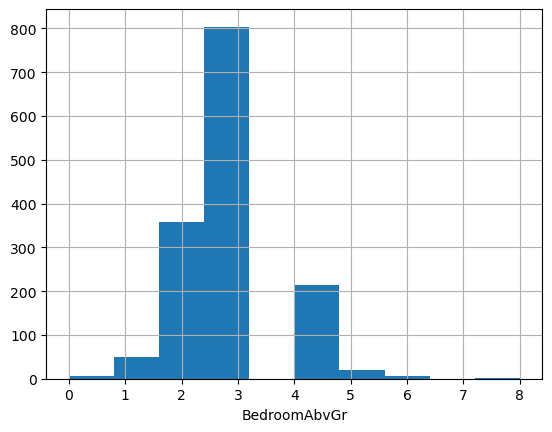

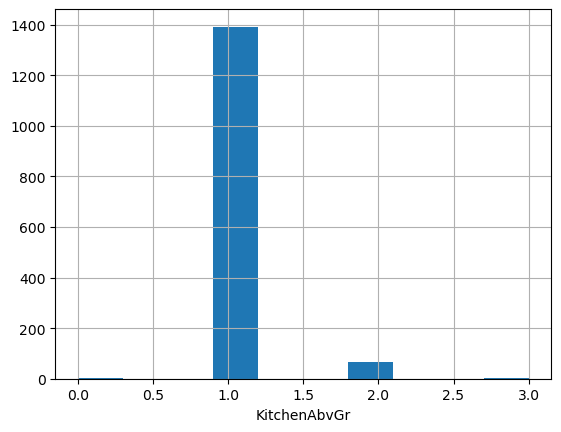

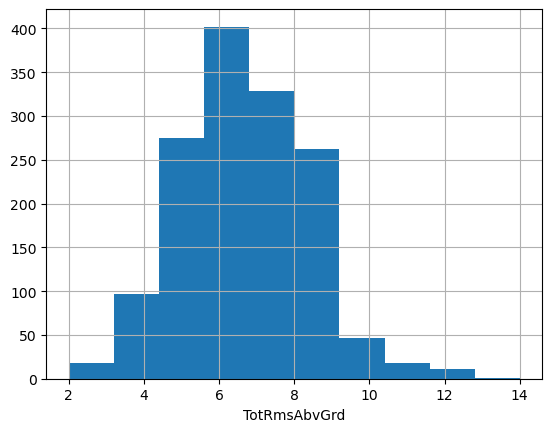

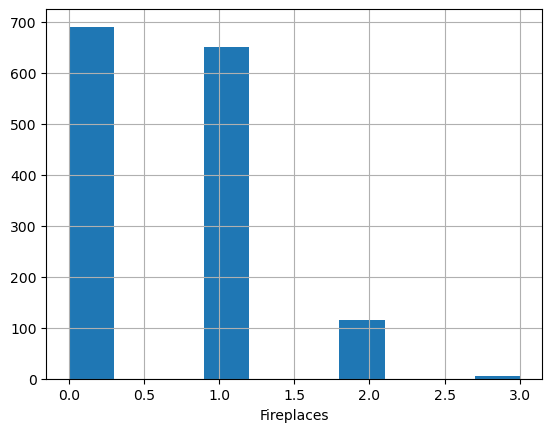

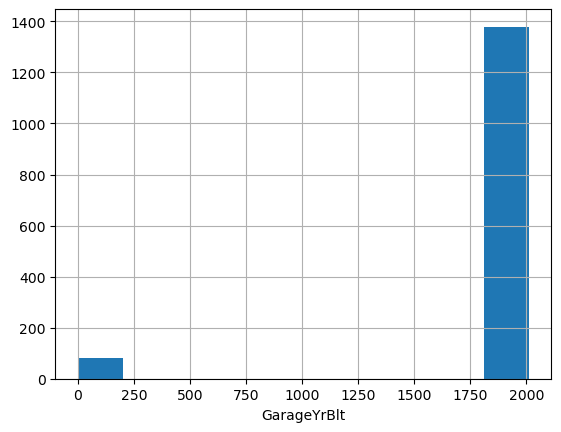

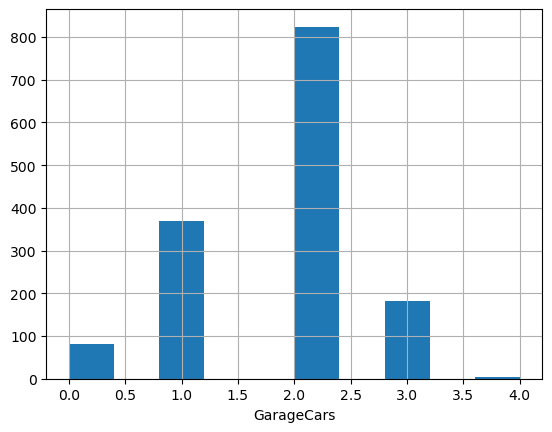

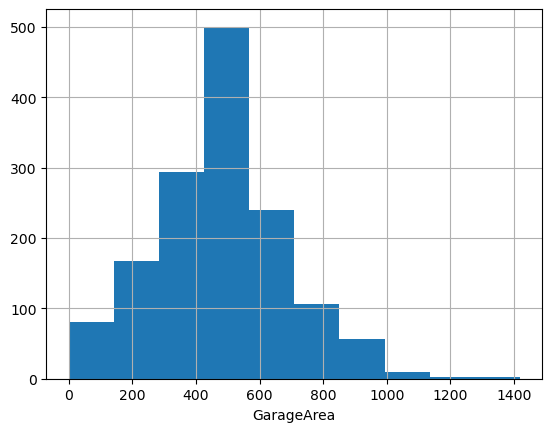

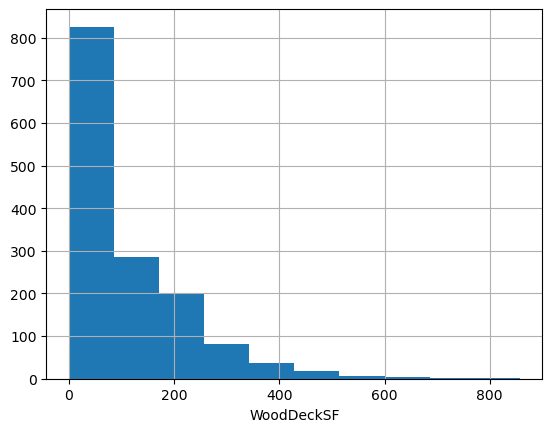

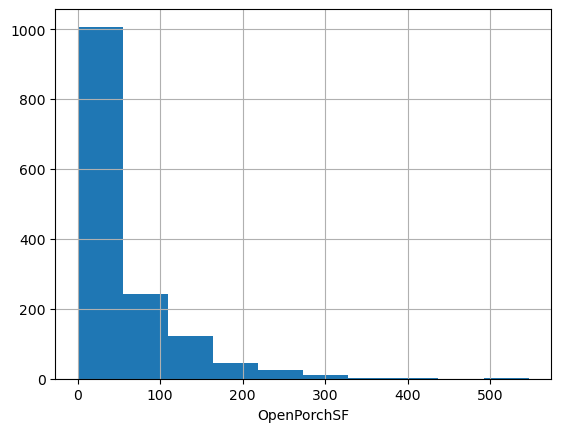

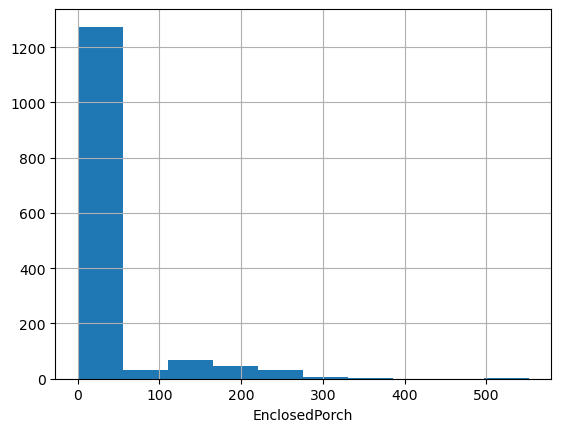

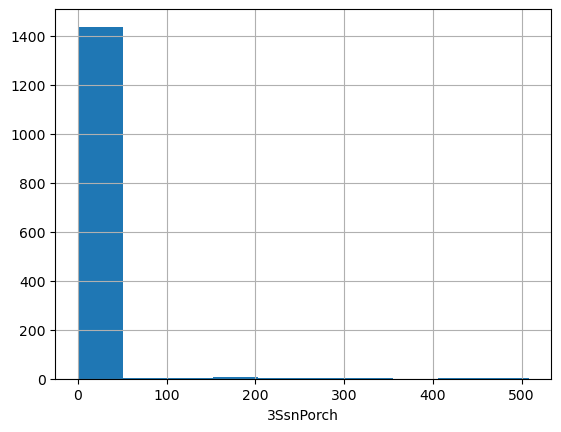

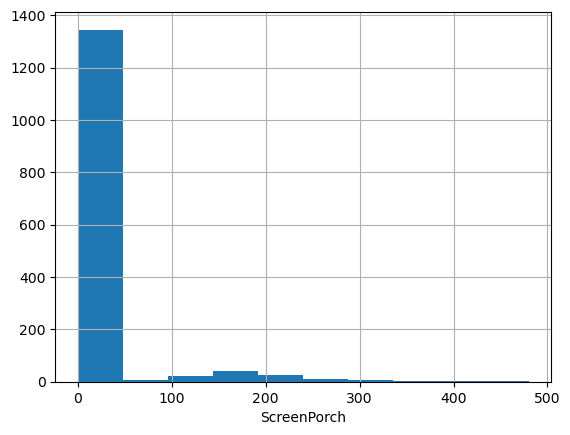

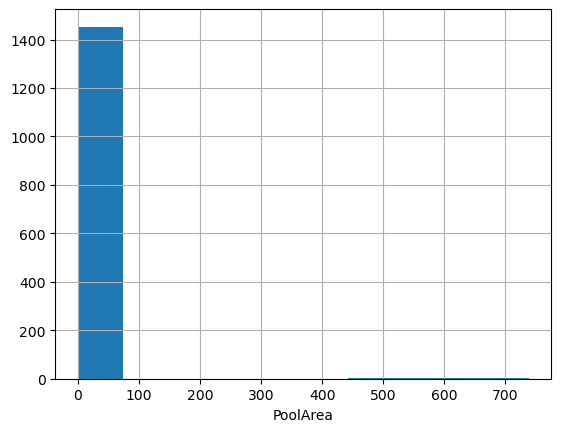

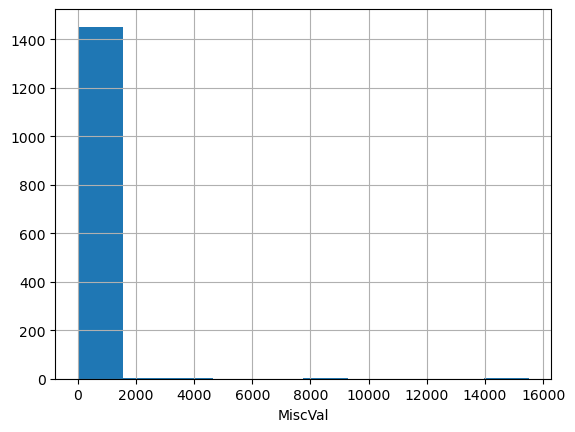

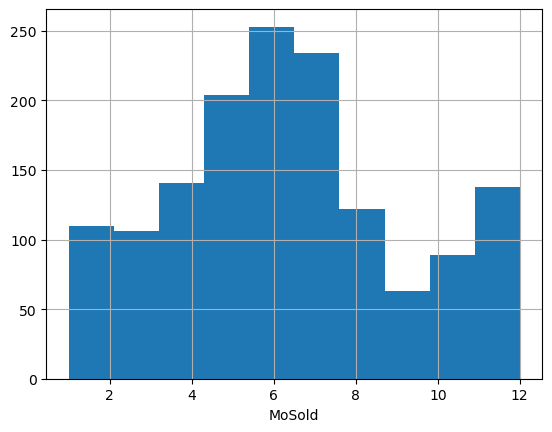

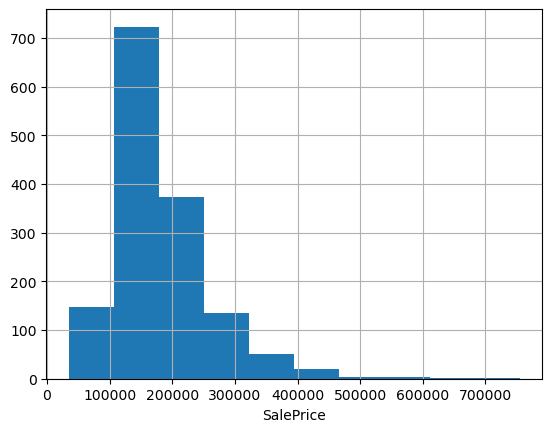

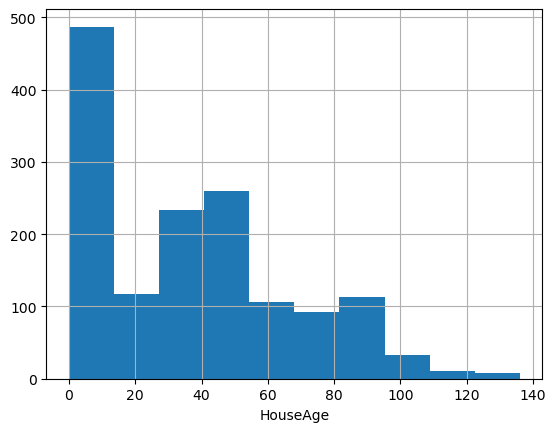

In [35]:
#checking for skewness in numerical data
numerical_features=[feature for feature in house_data.columns if house_data[feature].dtypes!='object']
for feature in numerical_features:
    if feature=='class(target)':
        pass
    else:
    
        
        house_data[feature].hist()
        plt.xlabel(feature)
        plt.show()

The histograms above describe the skewness of the data. 
We can see that LowQualFinSF, PoolArea, MiscVal, and 3SsnPorch contain very little variety in values

In [36]:
print(house_data['LowQualFinSF'].value_counts())
print(house_data['PoolArea'].value_counts())
print(house_data['MiscVal'].value_counts())
print(house_data['3SsnPorch'].value_counts())

LowQualFinSF
0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: count, dtype: int64
PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64
MiscVal
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: count, dtype: int64
3SsnPorch
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1


Because of very little variation they does not provide much information, we can drop them.

In [37]:
house_data=house_data.drop(['LowQualFinSF','PoolArea','MiscVal','3SsnPorch'],axis=1)

In [38]:
house_data.shape

(1460, 72)

In [39]:
#overview of the data
house_data.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SalePrice,HouseAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,69.863699,10516.828082,6.099315,5.575342,1984.865753,103.117123,443.639726,46.549315,567.240411,...,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,15.060959,6.321918,180921.195890,36.547945
std,421.610009,22.027677,9981.264932,1.382997,1.112799,20.645407,180.731373,456.098091,161.319273,441.866955,...,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,55.757415,2.703626,79442.502883,30.250152
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000
25%,365.750000,60.000000,7553.500000,5.000000,5.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,8.000000
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,6.000000,163000.000000,35.000000
75%,1095.250000,79.000000,11601.500000,7.000000,6.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,8.000000,214000.000000,54.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,12.000000,755000.000000,136.000000


# Outlier detection

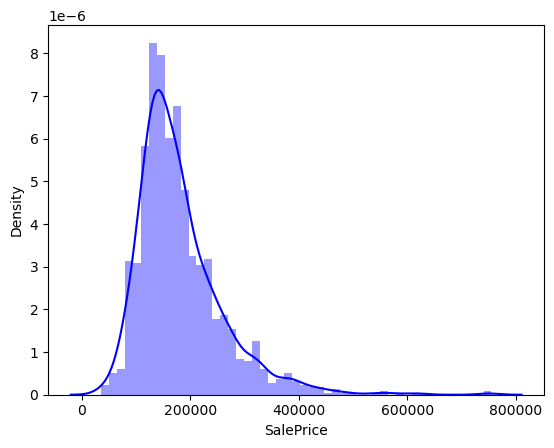

In [40]:
#visualise the dependent variable
plt.figure()
sns.distplot(house_data['SalePrice'],color='b')
plt.show()

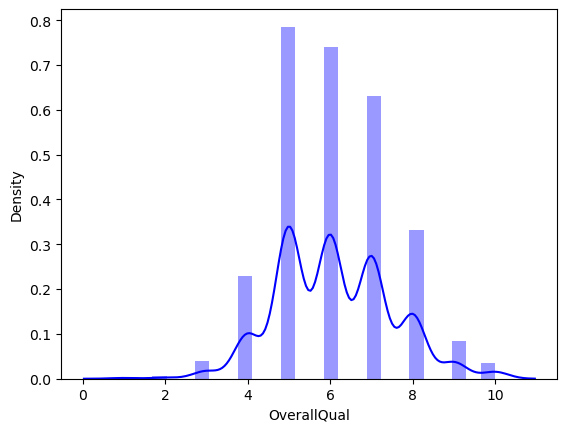

In [41]:
plt.figure()
sns.distplot(house_data['OverallQual'],color='b')
plt.show()

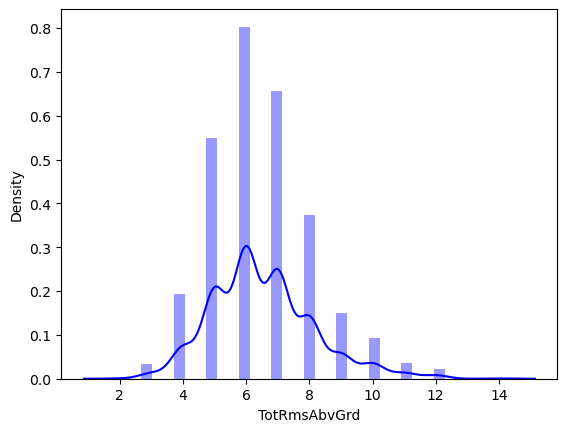

In [42]:
plt.figure()
sns.distplot(house_data['TotRmsAbvGrd'],color='b')
plt.show()

After checking the distribution of data, we can see the outliers are present

removing outliers from the columns, based on the interquartile range.

In [43]:
# IQR to remove the outlier
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'HouseAge', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch','ScreenPorch', 'MoSold', 'SalePrice'] 

Q1 = house_data[cols].quantile(0.05)
Q3 = house_data[cols].quantile(0.95)
IQR = Q3 - Q1

house_data = house_data[~((house_data[cols] < (Q1 - 1.5 * IQR)) |(house_data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

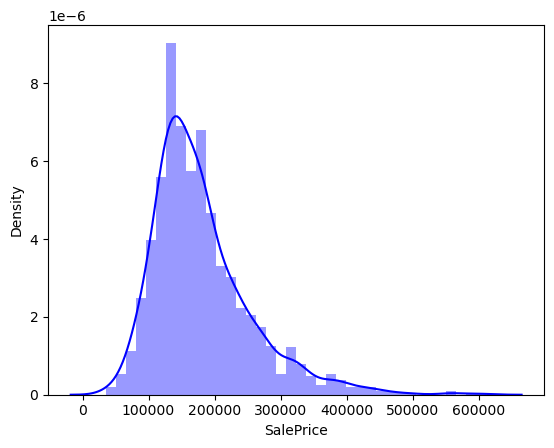

In [44]:
plt.figure()
sns.distplot(house_data['SalePrice'],color='b')
plt.show()

Some outliers have been removed. 

However, the target variable is skewed to the right. 

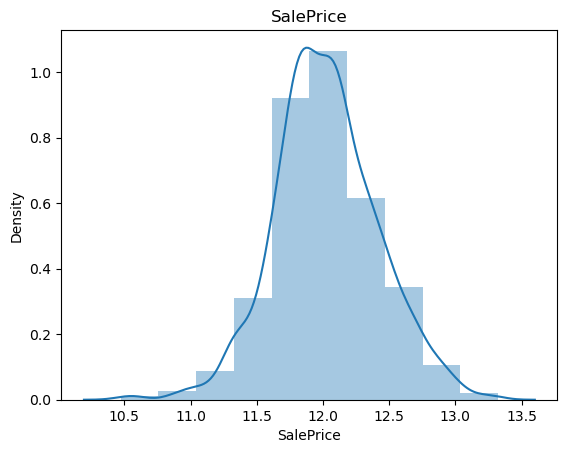

In [45]:
#transformed target variable using log to cure skewness

house_data['SalePrice'] = np.log1p(house_data['SalePrice'])

plt.title('SalePrice')
sns.distplot(house_data['SalePrice'], bins=10)
plt.show()

The dependent variable has been normalised with some noise

# Exploratory Data Analysis

In [46]:
# all numeric (float and int) variables in the dataset
house_num = house_data.select_dtypes(include=['float64', 'int64'])
house_num.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SalePrice,HouseAge
0,1,65.0,8450,7,5,2003,196.0,706,0,150,...,2003.0,2,548,0,61,0,0,2,12.247699,5
1,2,80.0,9600,6,8,1976,0.0,978,0,284,...,1976.0,2,460,298,0,0,0,5,12.109016,31
2,3,68.0,11250,7,5,2002,162.0,486,0,434,...,2001.0,2,608,0,42,0,0,9,12.317171,7
3,4,60.0,9550,7,5,1970,0.0,216,0,540,...,1998.0,3,642,0,35,272,0,2,11.849405,91
4,5,84.0,14260,8,5,2000,350.0,655,0,490,...,2000.0,3,836,192,84,0,0,12,12.429220,8


In [47]:
# dropping ID from numerical data and from the general data set as it does not add valuable information for the model
house_data = house_data.drop(['Id'], axis=1)
house_num = house_num.drop(['Id'], axis=1)
house_num.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SalePrice,HouseAge
0,65.0,8450,7,5,2003,196.0,706,0,150,856,...,2003.0,2,548,0,61,0,0,2,12.247699,5
1,80.0,9600,6,8,1976,0.0,978,0,284,1262,...,1976.0,2,460,298,0,0,0,5,12.109016,31
2,68.0,11250,7,5,2002,162.0,486,0,434,920,...,2001.0,2,608,0,42,0,0,9,12.317171,7
3,60.0,9550,7,5,1970,0.0,216,0,540,756,...,1998.0,3,642,0,35,272,0,2,11.849405,91
4,84.0,14260,8,5,2000,350.0,655,0,490,1145,...,2000.0,3,836,192,84,0,0,12,12.429220,8


#### Visualising Numerical variables

<Figure size 1000x500 with 0 Axes>

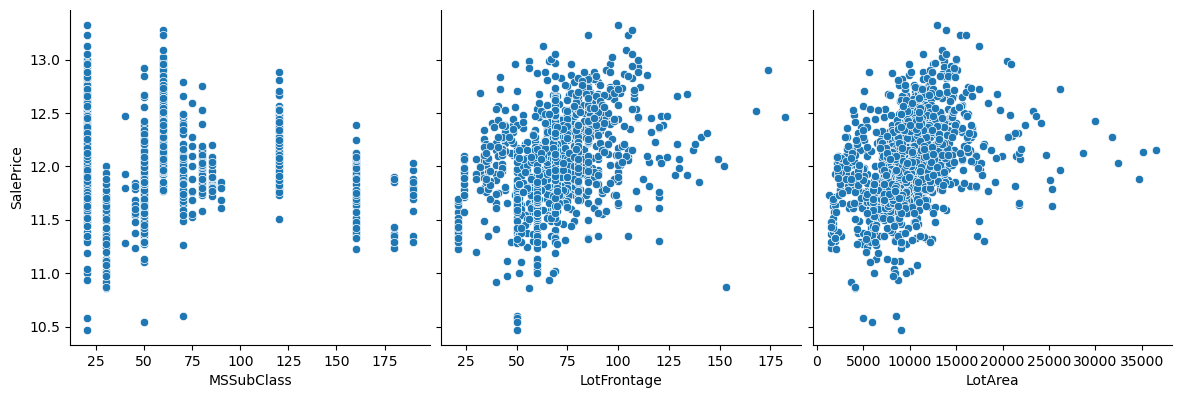

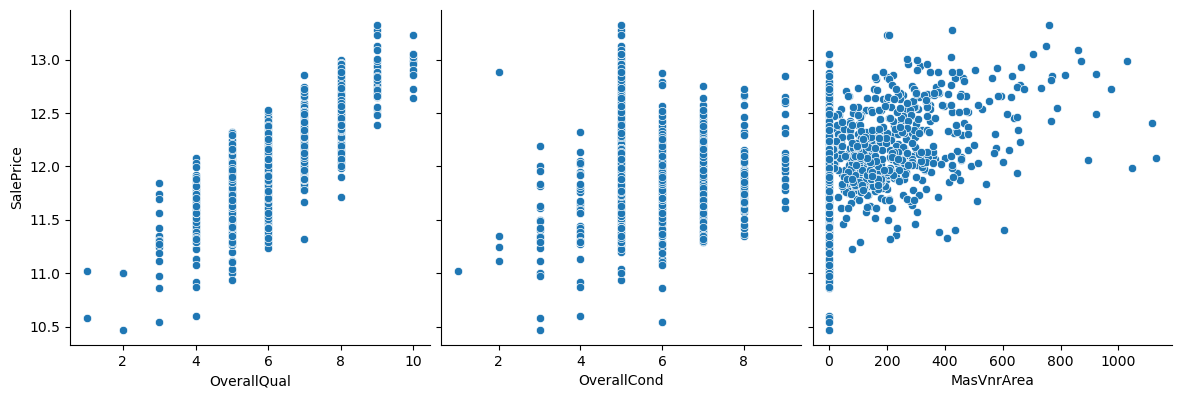

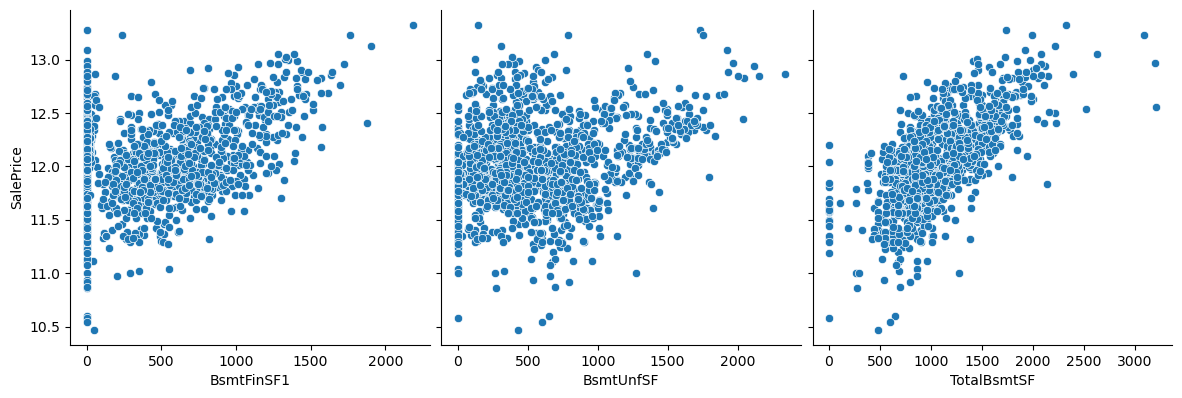

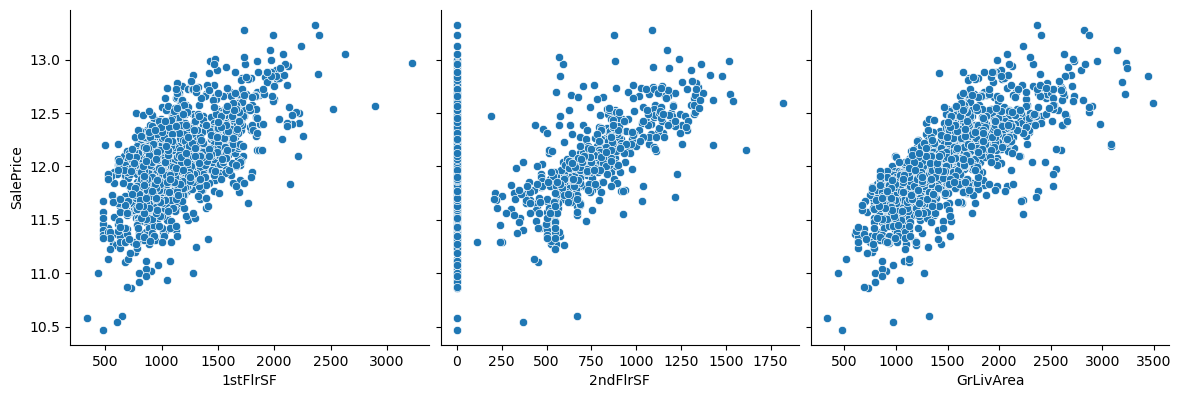

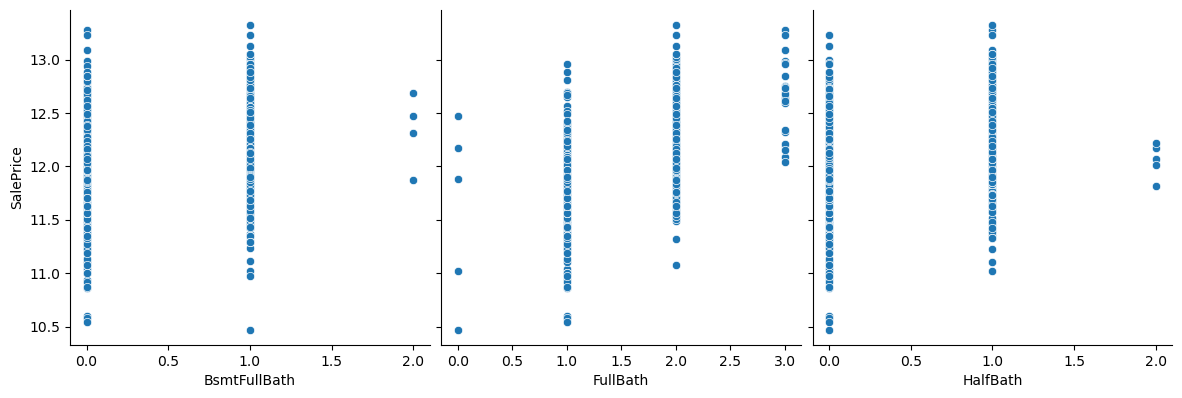

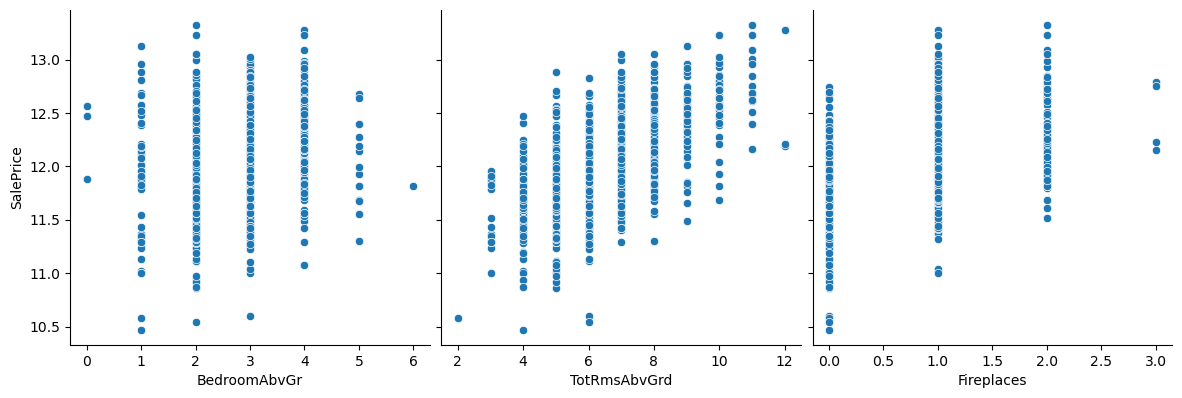

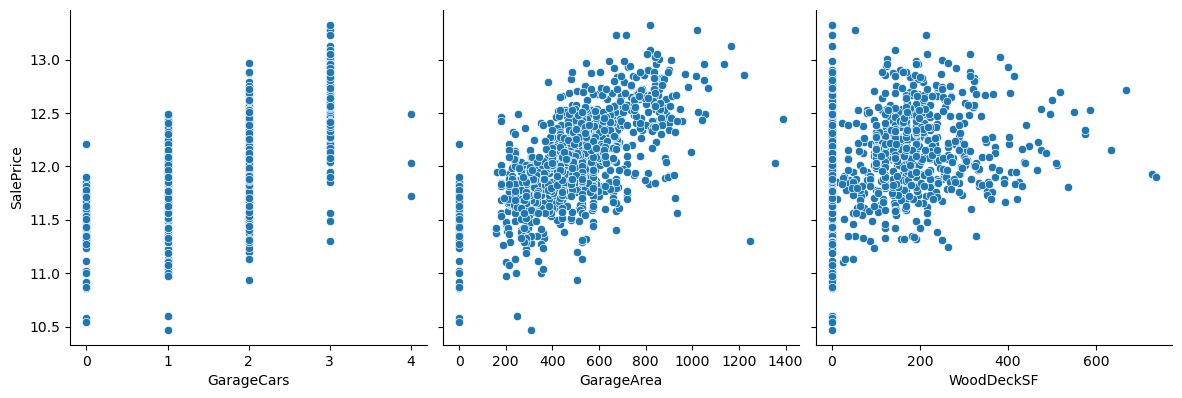

In [48]:
plt.figure(figsize=(10,5))
sns.pairplot(house_data, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_data, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_data, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_data, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_data, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_data, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_data, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

The graphs show relations between selected variables and the dependent variable. GrLivArea shows the strongest linearity.

While there is no clear correlation line, it appears that the larger the living area, the higher the price will be.

#### Identifying correlations

In [49]:
cor = house_num.corr()
cor

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SalePrice,HouseAge
LotFrontage,1.000000,0.526729,0.220060,-0.063988,0.079399,0.165461,0.135812,0.037861,0.148522,0.321598,...,0.104250,0.290353,0.317449,0.091117,0.123925,-0.000104,0.053106,0.012437,0.364280,-0.133105
LotArea,0.526729,1.000000,0.158632,-0.028698,0.019139,0.136209,0.186061,0.056191,0.074307,0.300370,...,0.139681,0.283762,0.321187,0.176458,0.147972,-0.013890,0.093827,-0.010367,0.373936,-0.055204
OverallQual,0.220060,0.158632,1.000000,-0.134884,0.548493,0.415394,0.203358,-0.109144,0.338616,0.552030,...,0.284075,0.625290,0.564754,0.225894,0.318338,-0.126046,0.040562,0.086078,0.823638,-0.593927
OverallCond,-0.063988,-0.028698,-0.134884,1.000000,0.042184,-0.136614,-0.037206,0.049467,-0.153006,-0.190745,...,-0.015062,-0.205957,-0.173479,-0.024767,-0.068616,0.081037,0.041587,0.001168,-0.075506,0.397315
YearRemodAdd,0.079399,0.019139,0.548493,0.042184,1.000000,0.179898,0.107205,-0.100204,0.208382,0.309117,...,0.152361,0.451437,0.390552,0.191182,0.253294,-0.209257,-0.047794,0.026091,0.568793,-0.608167
MasVnrArea,0.165461,0.136209,0.415394,-0.136614,0.179898,1.000000,0.230565,-0.066045,0.123286,0.359799,...,0.133056,0.375918,0.378886,0.157370,0.131969,-0.102546,0.058424,-0.005703,0.440150,-0.314273
BsmtFinSF1,0.135812,0.186061,0.203358,-0.037206,0.107205,0.230565,1.000000,-0.056094,-0.544591,0.455673,...,0.124274,0.226395,0.275884,0.173257,0.086807,-0.107368,0.074164,-0.004906,0.371612,-0.238810
BsmtFinSF2,0.037861,0.056191,-0.109144,0.049467,-0.100204,-0.066045,-0.056094,1.000000,-0.197520,0.066992,...,0.020850,-0.064699,-0.037398,0.050483,-0.023879,0.054918,0.051395,-0.003287,-0.055153,0.080542
BsmtUnfSF,0.148522,0.074307,0.338616,-0.153006,0.208382,0.123286,-0.544591,-0.197520,1.000000,0.445108,...,0.049534,0.238122,0.197320,0.019740,0.125419,-0.004320,-0.013205,0.033176,0.250040,-0.179858
TotalBsmtSF,0.321598,0.300370,0.552030,-0.190745,0.309117,0.359799,0.455673,0.066992,0.445108,1.000000,...,0.194782,0.481770,0.499467,0.224814,0.222471,-0.100997,0.082719,0.030004,0.653857,-0.425718


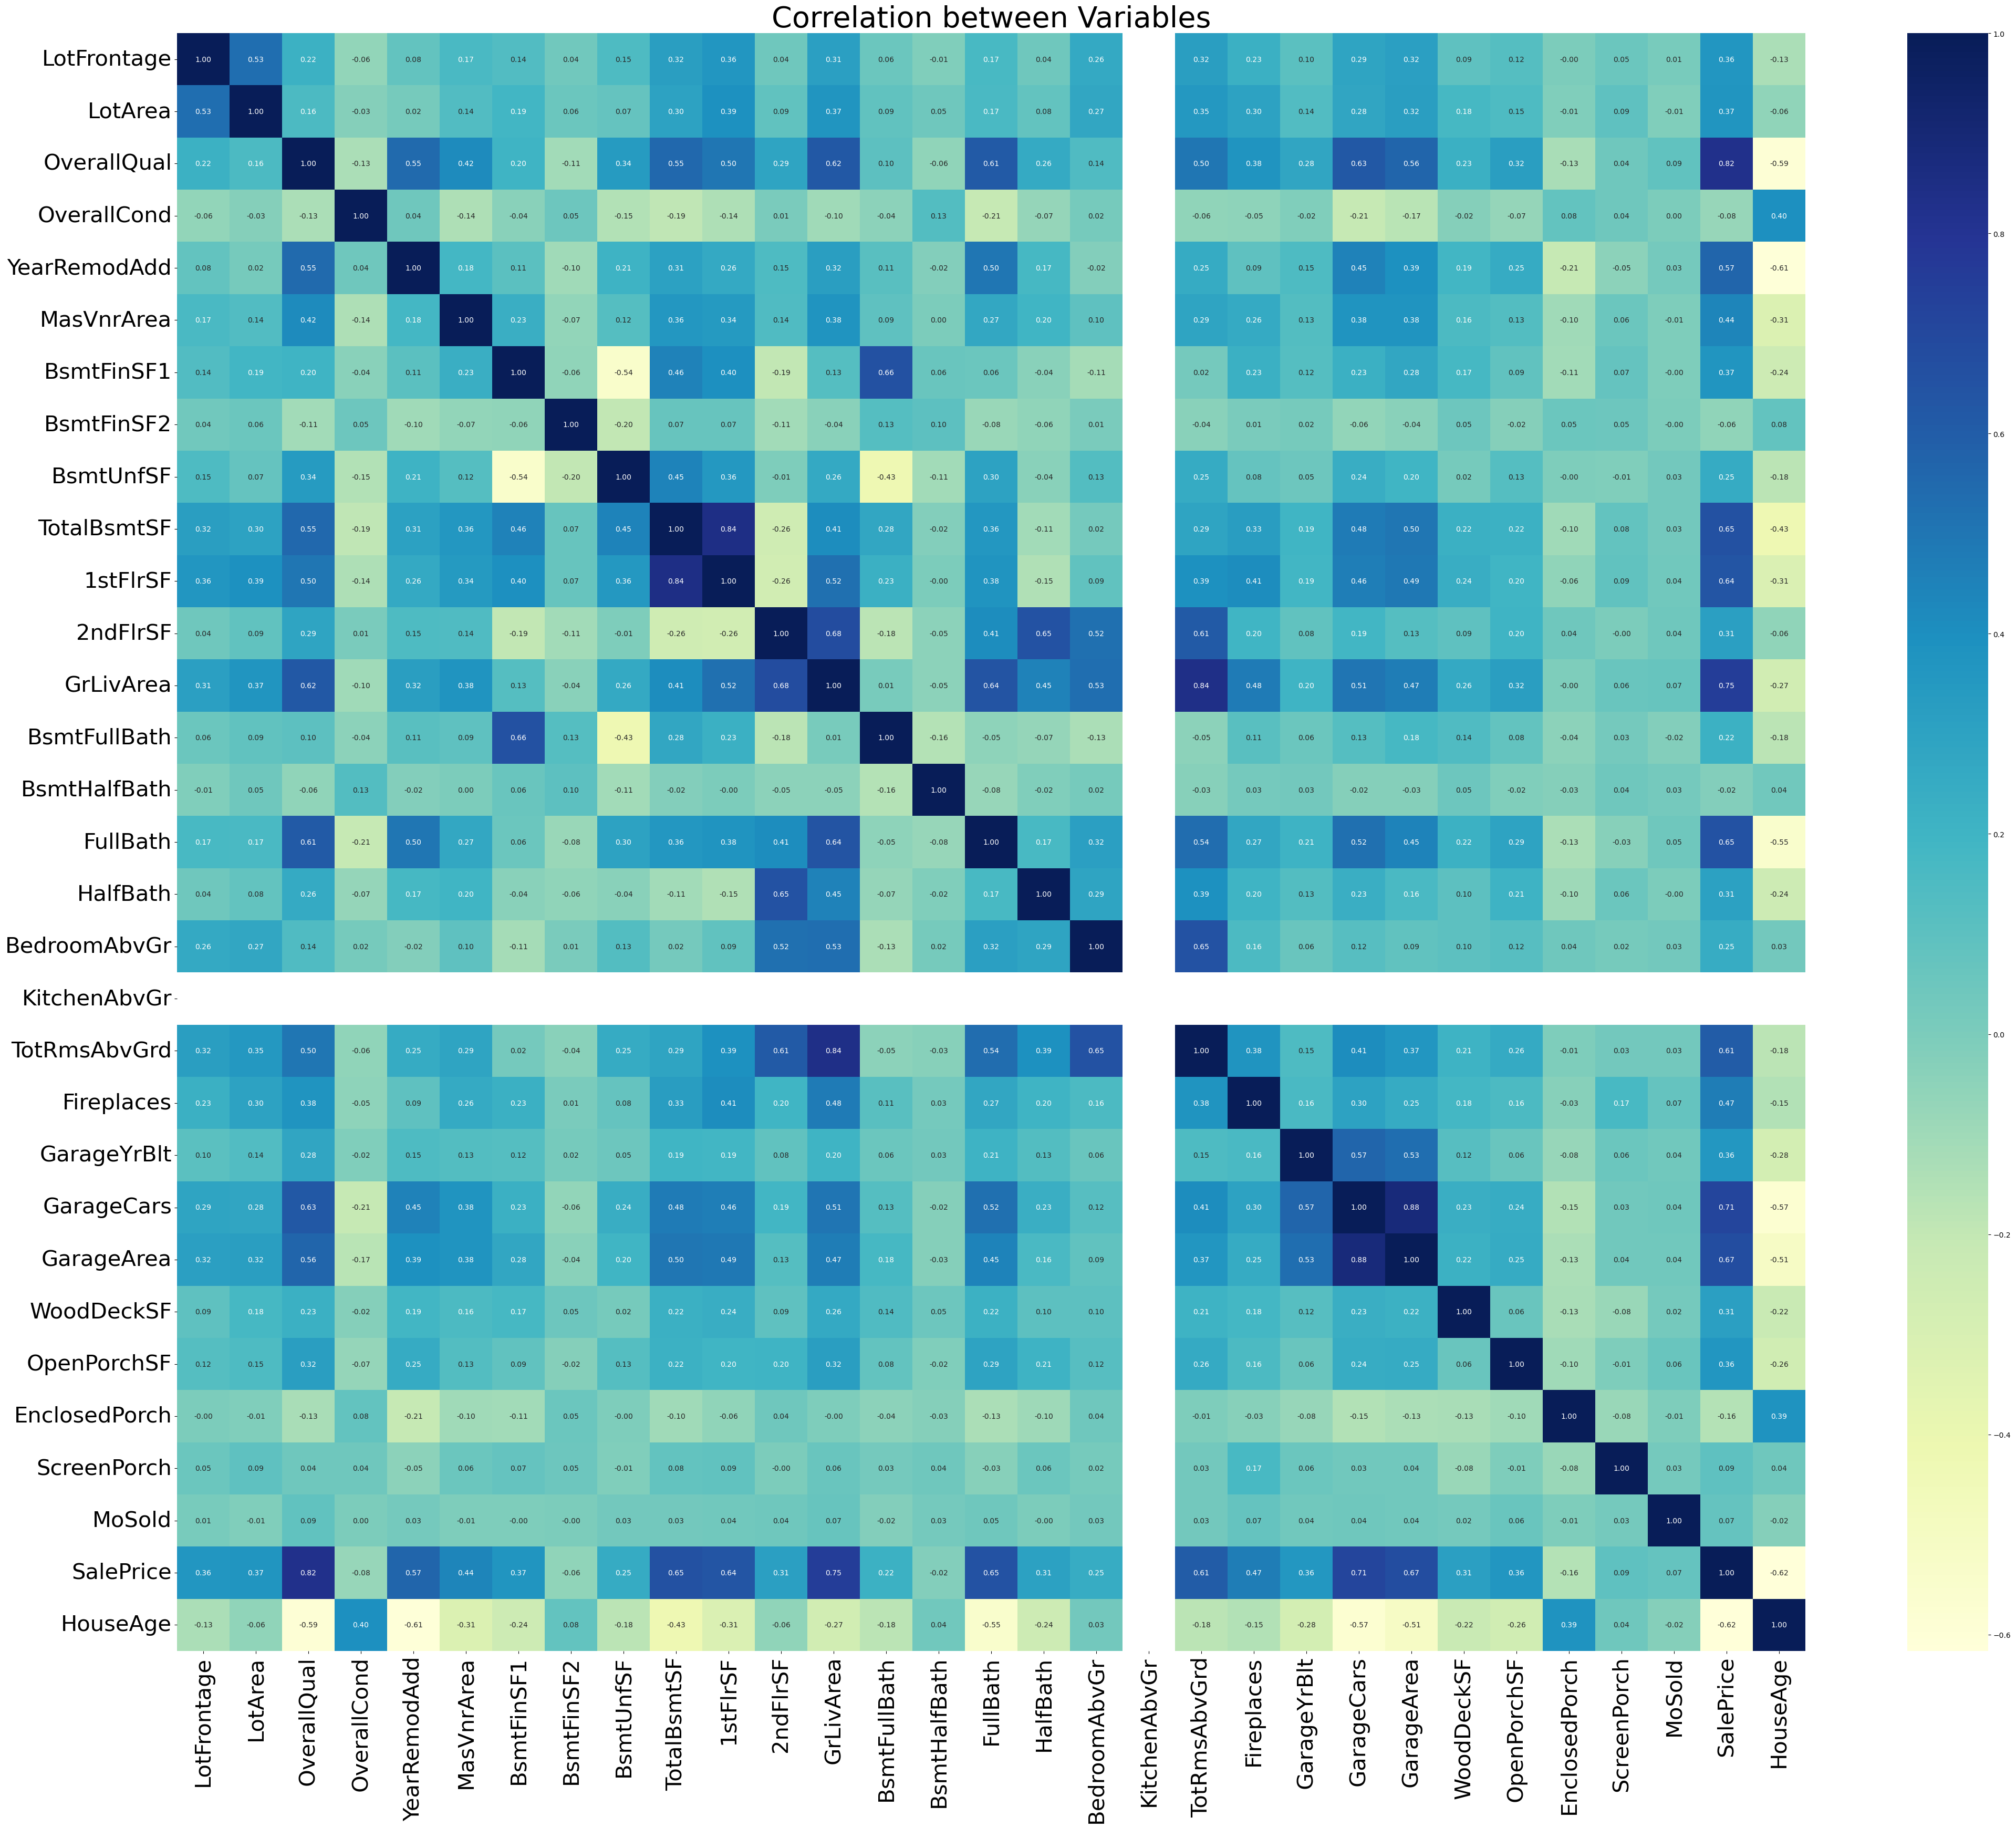

In [50]:
# plotting correlations on a heatmap

plt.figure(figsize=(50,40))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True, fmt='.2f')
plt.title("Correlation between Variables", fontsize=40)
plt.show()

Sale price is highly positively correlated with OverallQual, GrLivArea

Sale price is positively correlated with TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, GarageCars, GarageArea

Some independent variables are highly correlated with each other. 
This has to be considered because of multicollinearity that may become an issue in the model

TotRmsAbvGrd and GrLivArea are highly correlated

GarageArea and GarageCars are highly correlated

1stFlrSF and  TotalBsmtSF are highly correlated

One of the highly correlated variables above needed to be dropped

In [51]:
house_data.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea'], axis=1,inplace=True)

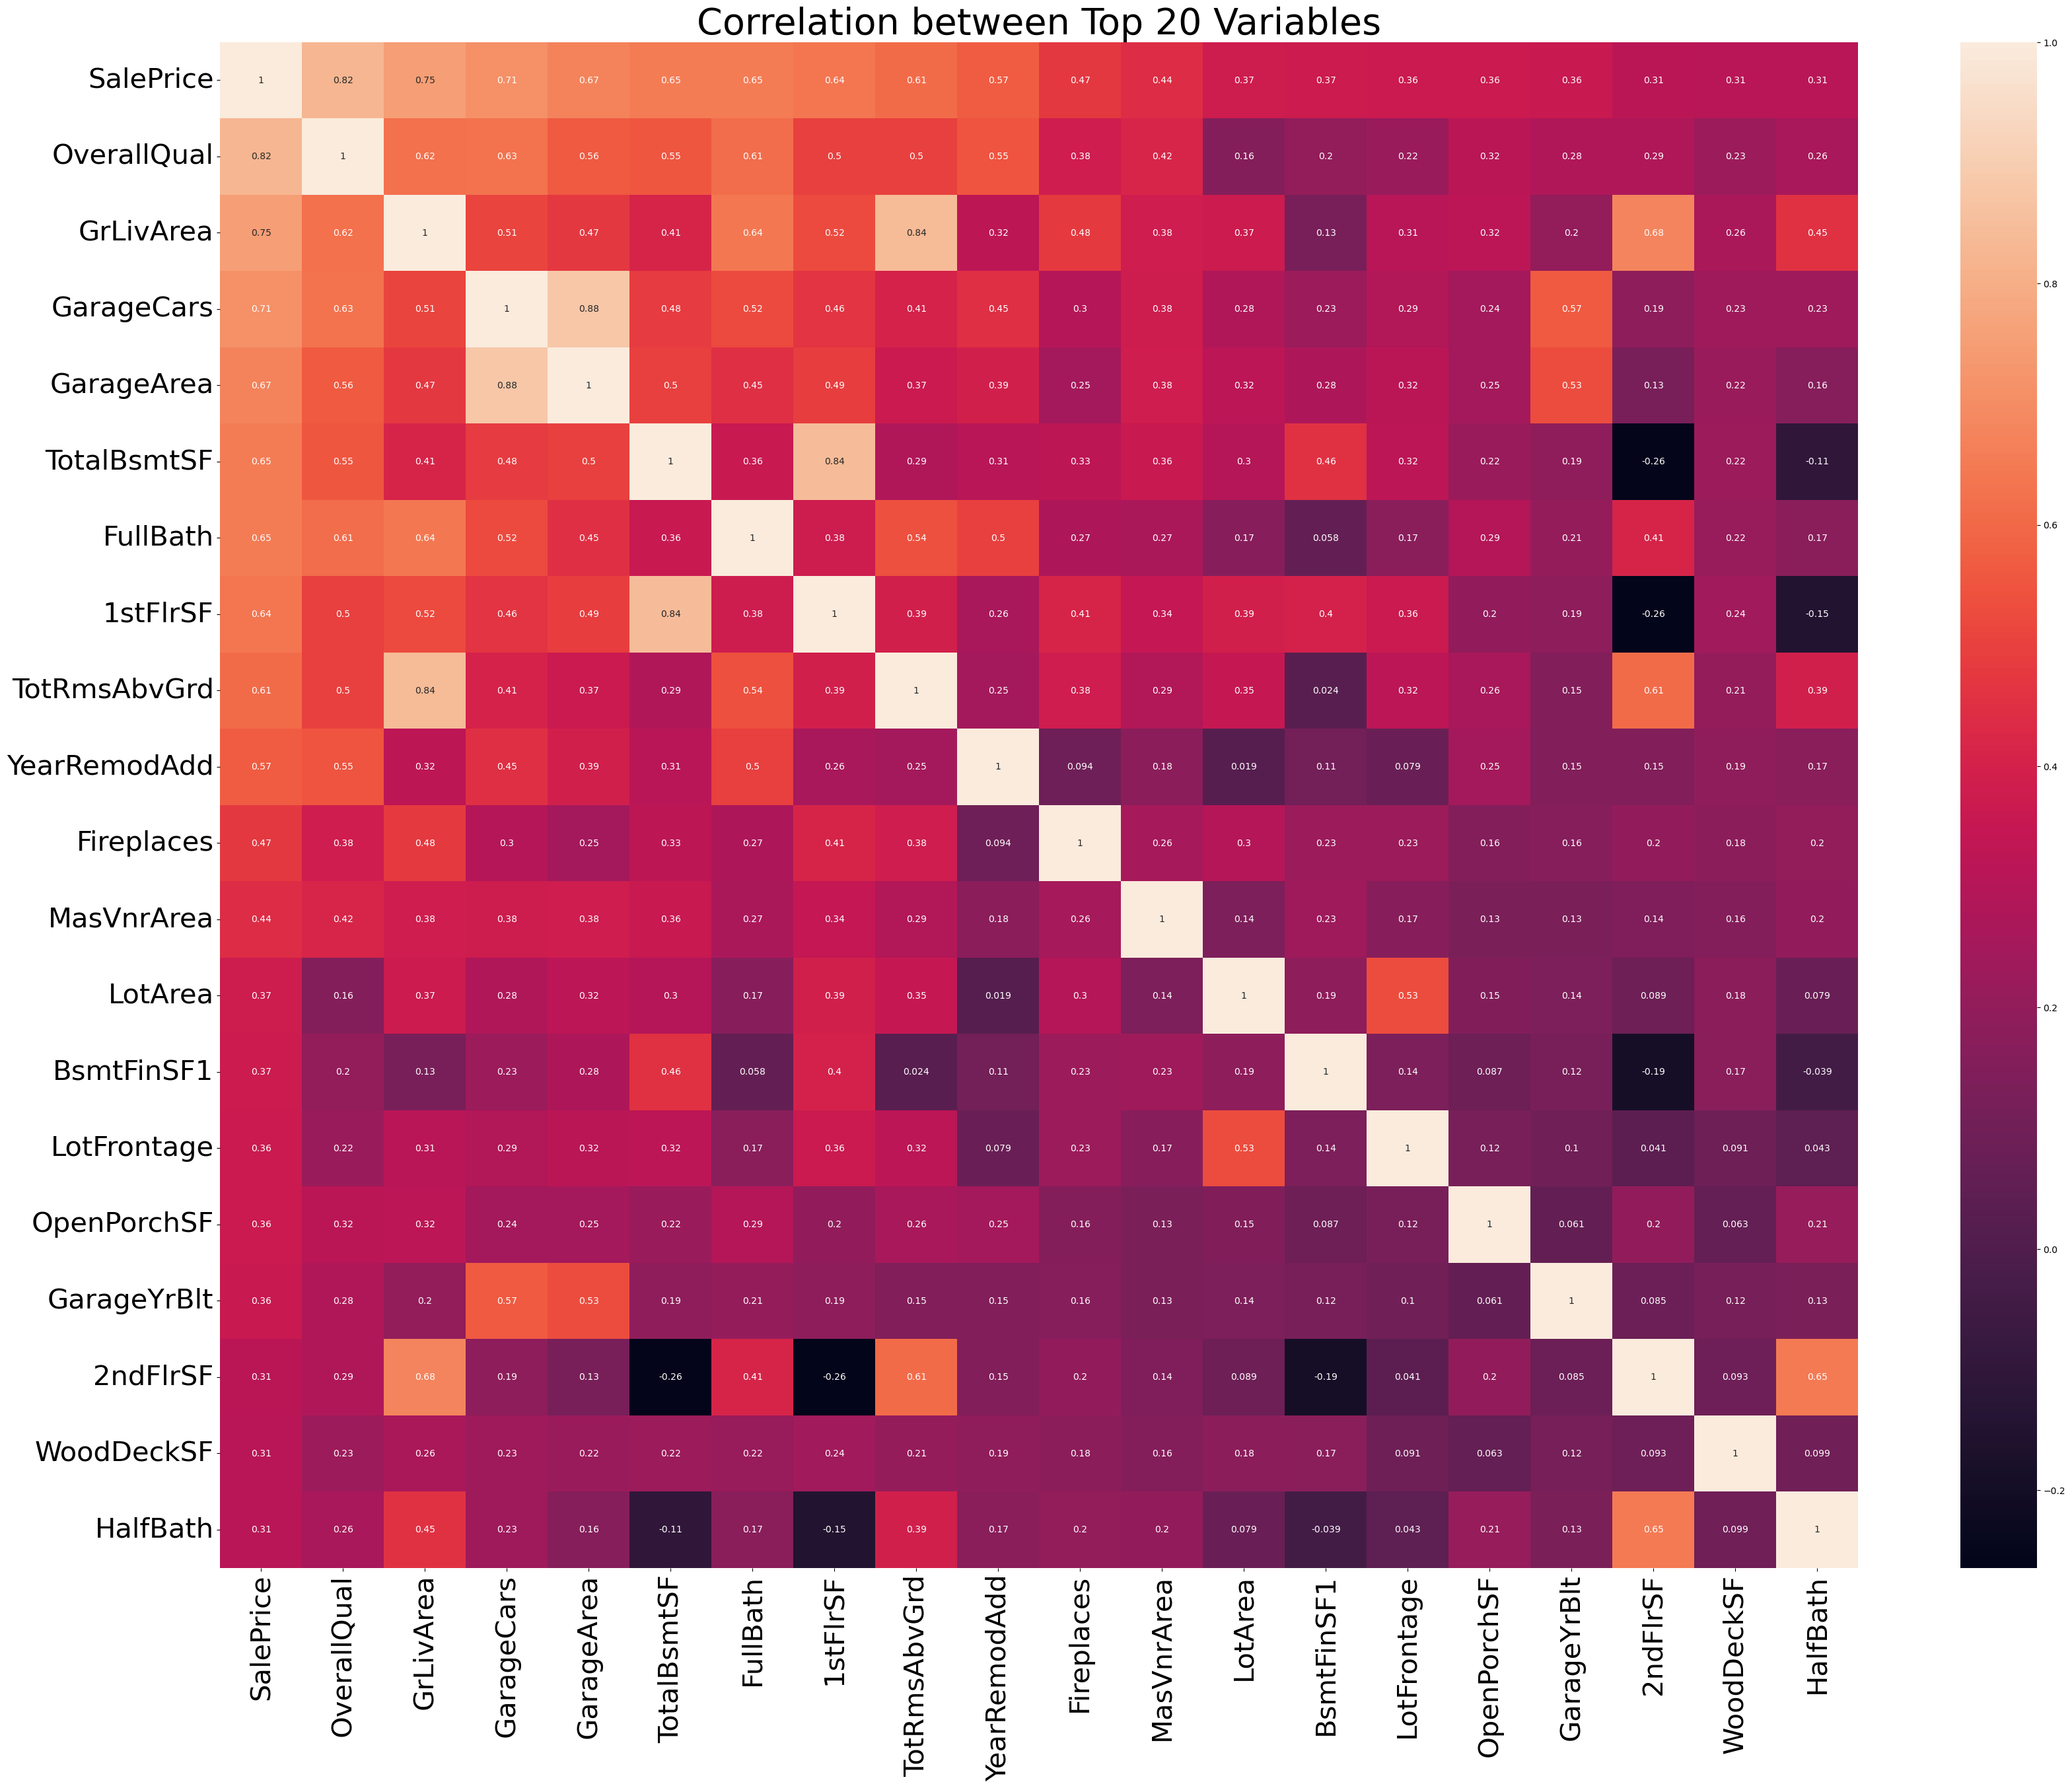

In [52]:
#visualised the 20 most highly postively correlated variables to Sale Price.

plt.figure(figsize=(40,30))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
n = 20 # number of variables which have the highest correlation with 'Sales price'

corrmat = house_num.corr()

cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
#plt.figure(dpi=100)
sns.heatmap(house_num[cols].corr(),annot=True)
plt.title("Correlation between Top 20 Variables", fontsize=40)
plt.show()

# Data preparation

#### Creating dummy variables

In [53]:
#Check which columns containg categorical data
house_categorical=house_data.select_dtypes(include=['object'])
house_categorical.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [54]:
# Convert categorical value into Dummy variables (one hot encoding)
house_dummies=pd.get_dummies(house_categorical,drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [55]:
# drop categorical variables from the dataset and save as predictor variable X
X= house_data.drop(list(house_categorical.columns), axis=1)

In [56]:
#removing response variable from the set
X=X.drop(['SalePrice'], axis=1)

In [57]:
y = house_data['SalePrice'] # response variable in Y

In [58]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [59]:
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,196.0,706,0,150,856,...,False,False,False,False,True,False,False,False,True,False
1,80.0,9600,6,8,1976,0.0,978,0,284,1262,...,False,False,False,False,True,False,False,False,True,False
2,68.0,11250,7,5,2002,162.0,486,0,434,920,...,False,False,False,False,True,False,False,False,True,False
3,60.0,9550,7,5,1970,0.0,216,0,540,756,...,False,False,False,False,True,False,False,False,False,False
4,84.0,14260,8,5,2000,350.0,655,0,490,1145,...,False,False,False,False,True,False,False,False,True,False


In [60]:
# storing column names in cols (the df is converted to a numpy array)
# Standardize a dataset along any axis
# Center to the mean and component wise scale to unit variance.
cols = X.columns
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=242)

In [61]:
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.214729,-0.301556,0.643699,-0.537949,0.848046,0.557189,0.630373,-0.290924,-0.969815,-0.487945,...,-0.054393,-0.060836,-0.310162,-0.038433,0.396228,-0.038433,-0.054393,-0.112677,0.459036,-0.314429
1,0.537784,-0.022178,-0.095383,2.183911,-0.461085,-0.593667,1.271641,-0.290924,-0.660993,0.538541,...,-0.054393,-0.060836,-0.310162,-0.038433,0.396228,-0.038433,-0.054393,-0.112677,0.459036,-0.314429
2,-0.064226,0.378669,0.643699,-0.537949,0.799559,0.357551,0.111701,-0.290924,-0.315296,-0.326135,...,-0.054393,-0.060836,-0.310162,-0.038433,0.396228,-0.038433,-0.054393,-0.112677,0.459036,-0.314429
3,-0.465566,-0.034325,0.643699,-0.537949,-0.752003,-0.593667,-0.524852,-0.290924,-0.071004,-0.740774,...,-0.054393,-0.060836,-0.310162,-0.038433,0.396228,-0.038433,-0.054393,-0.112677,-2.178477,-0.314429
4,0.738454,1.109911,1.382781,-0.537949,0.702587,1.461433,0.510136,-0.290924,-0.186236,0.242731,...,-0.054393,-0.060836,-0.310162,-0.038433,0.396228,-0.038433,-0.054393,-0.112677,0.459036,-0.314429


# Splitting the dataset

In [62]:
# split into train and test
X_train, X_test, y_train,  y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=47)

# Linear model

In [63]:
# Instantiate linear regression
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [64]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

33044827.736610867
[ 1.09112999e-02  2.87910423e-02  5.28955165e-02  3.81394192e-02
  2.19166474e-02  6.68574518e-03  1.26012096e+10  4.04022674e+09
  1.28907689e+10 -1.17504791e+10  3.32498550e-03  1.38427734e-01
  6.77728653e-03  5.49235940e-03  7.36641884e-03  1.14020109e-02
  8.10450315e-03 -3.38474627e+08 -2.69341469e-03 -1.32769108e-01
  2.42247581e-02  8.91256332e-03  1.12613440e-02  1.16467476e-03
  1.14274621e-02 -3.04079056e-03 -6.26034737e-02 -5.03778458e-03
 -1.58865452e-02 -2.93856859e-02 -1.43160820e-02 -1.85171366e-02
 -1.55639648e-03  9.81760025e-03 -1.60908699e-02  9.07421112e-03
 -1.39543219e+09  2.50458717e-04 -2.73451805e-02  5.45287132e-03
 -9.90932285e+09  9.47583914e-02  4.18324471e-02  1.58811092e-01
  1.16111755e-01  1.58774853e-03 -3.77714634e-04 -5.65052032e-04
  7.14898109e-03  2.52529979e-03 -2.56109238e-03  6.81400299e-04
 -7.24798441e-03  1.02224350e-02 -7.08913803e-03 -2.54917145e-03
 -6.40368462e-03  7.34567642e-04 -1.57784820e-02  3.98051739e-03
  5.30

In [65]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [66]:
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 train: ', r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 test: ',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1: ',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2: ',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE train: ',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE test: ',mse_test_lr)
metric.append(mse_test_lr**0.5)

r2 train:  0.9578605534552549
r2 test:  -6.538356265805019e+20
rss1:  6.3642052214316145
rss2:  3.6176868983763227e+22
MSE train:  0.0067062225726360536
MSE test:  8.888665597976224e+19


The model using all of the features is highly overfitting. R2 is negative only when the chosen model does not follow the trend of the data, that is, the fit is worse than a horizontal line. This model is highly problematic. It shows a high score in the training data, but this will be due to the model learning the data and overfitting on the training data.
In the following step, ridge and lasso are applied to compare the result.

# Ridge and Lasso Regression

#### Ridge Regression

In [67]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 100}
-0.08194068252198898


In [69]:
alpha = 100
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.22638928e-02,  2.60769291e-02,  5.33625744e-02,  3.27222099e-02,
        2.38095038e-02,  9.25869279e-03,  3.22450022e-02,  7.27177666e-03,
        5.92873356e-03,  4.35838903e-02,  1.83988438e-02,  7.87833575e-02,
        8.20685858e-03,  2.44823193e-03,  1.90884763e-02,  1.46472145e-02,
        1.27797579e-02,  0.00000000e+00,  7.47715668e-03,  4.21145036e-03,
        2.35408062e-02,  9.12010941e-03,  1.39247410e-02, -6.03012512e-04,
        1.06280669e-02, -2.65130461e-03, -2.58471959e-02, -6.34493318e-03,
       -9.82395390e-03, -4.72798593e-03, -4.82712427e-03, -1.75317202e-03,
        5.24942904e-03,  2.67627386e-03, -4.11074851e-03,  4.25912821e-03,
        2.09482979e-03,  1.08011082e-03, -1.41403027e-02,  4.38380701e-03,
       -1.61293918e-03,  1.13549439e-02,  9.21430448e-03,  1.48018422e-02,
       -1.50051449e-04,  8.82268398e-03, -5.99967462e-04, -7.97086422e-04,
        2.52266960e-03,  1.65426765e-03, -4.67338550e-03, -3.75171096e-04,
       -5.49705382e-03,  

In [70]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9509712104854696
0.8938623026309656
7.4046838251072415
5.8726221329346835
0.007802617307805313
0.014429047009667528


The model is fitting better now. All features are retained in ridge regression. There is a gap beetween training and testing score. The training score is slightly lower than the regression model before, but the testing score is much better than the previous version.

### Lasso Regression

In [71]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.001}
-0.07987102193161458


In [73]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [74]:
lasso.coef_

array([ 1.03392175e-02,  2.59922339e-02,  6.35989470e-02,  4.22748293e-02,
        2.13845714e-02,  4.72512742e-03,  3.27967042e-02,  5.98979479e-03,
       -0.00000000e+00,  3.39844535e-02,  0.00000000e+00,  1.36949659e-01,
        5.31635900e-03,  8.78096493e-04,  3.95984682e-03,  7.34855986e-03,
        6.24271580e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.29569644e-02,  8.08337995e-03,  1.25836540e-02,  0.00000000e+00,
        1.10073153e-02, -1.50574106e-03, -5.84733983e-02,  0.00000000e+00,
       -9.92128594e-03, -0.00000000e+00, -5.54520184e-03, -8.18280775e-03,
        1.09943947e-03,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -2.05620166e-02,  0.00000000e+00,
       -0.00000000e+00,  1.67062090e-02,  1.01586072e-02,  1.92020237e-02,
        0.00000000e+00,  6.98712437e-03, -0.00000000e+00,  0.00000000e+00,
        2.16247632e-03,  1.01917891e-03, -2.27501960e-03,  0.00000000e+00,
       -3.56952072e-03,  

In [75]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [76]:
metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9528139712646521
0.8942733674289575
7.126376710649308
5.849877827277055
0.0075093537520013786
0.014373164194783919


The result is almost similar but test result in lasso is bettter.

In [77]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.578606e-01,0.950971,0.952814
1,R2 Score (Test),-6.538356e+20,0.893862,0.894273
2,RSS (Train),6.364205e+00,7.404684,7.126377
3,RSS (Test),3.617687e+22,5.872622,5.849878
4,MSE (Train),8.189153e-02,0.088332,0.086657
5,MSE (Test),9.427972e+09,0.120121,0.119888


The model with all of the features and no other processing overfits immensely. Both Ridge and Lasso produce a better performing model, with Lasso outperforming Ridge slightly.

# Predictions and Normality of Residuals

In [78]:
ridge_pred = ridge.predict(X_test)

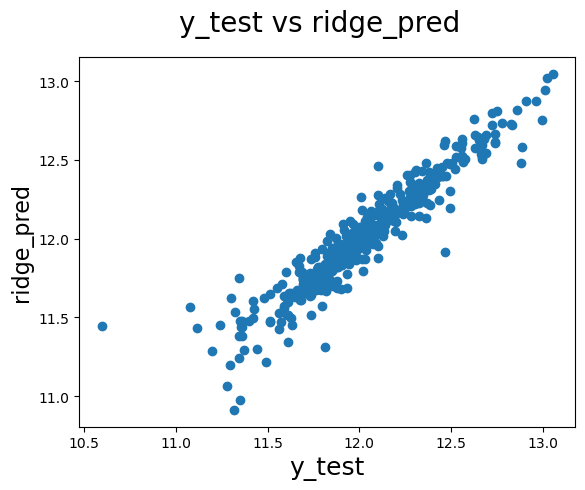

In [79]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

The graph shows that the linear relationship is presented by the model

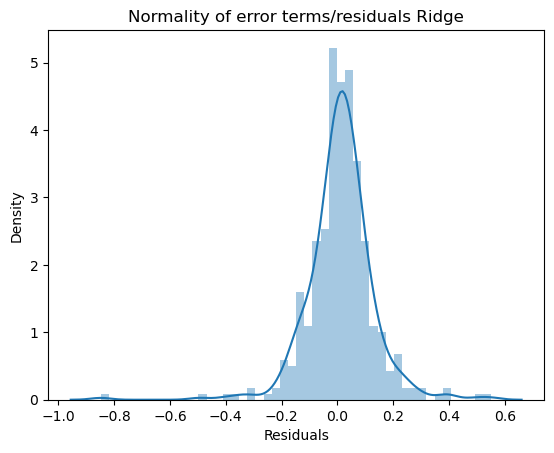

In [80]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals Ridge')
plt.xlabel("Residuals")
plt.show()

 The residuals are almost normal a bit skewed.

In [81]:
lasso_pred = lasso.predict(X_test)

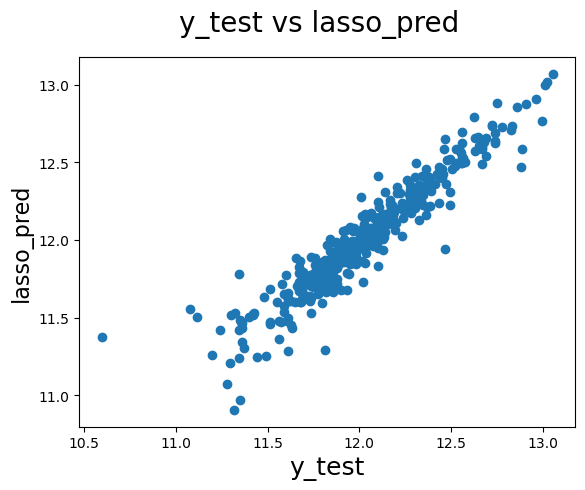

In [82]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

Plot almost similar to Ridge Regression.

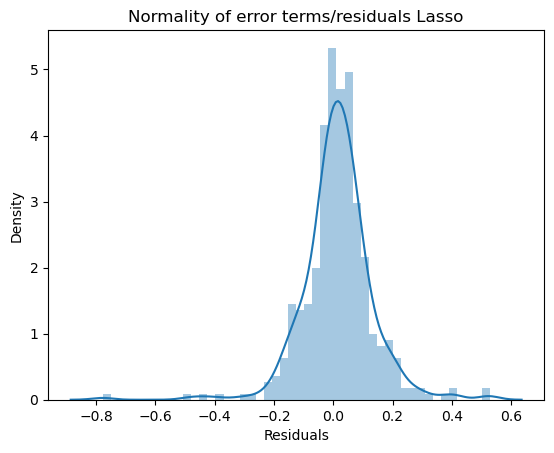

In [84]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals Lasso')
plt.xlabel("Residuals")
plt.show()

almost similar to Ridge Regression.

In [85]:
betas = pd.DataFrame(index=X_train.columns)

In [86]:
betas.rows = X_train.columns

In [87]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [88]:
betas.head(20)

,Linear,Ridge,Lasso
LotFrontage,1.091130e-02,0.012264,0.010339
LotArea,2.879104e-02,0.026077,0.025992
OverallQual,5.289552e-02,0.053363,0.063599
OverallCond,3.813942e-02,0.032722,0.042275
YearRemodAdd,2.191665e-02,0.023810,0.021385
MasVnrArea,6.685745e-03,0.009259,0.004725
BsmtFinSF1,1.260121e+10,0.032245,0.032797
BsmtFinSF2,4.040227e+09,0.007272,0.005990
BsmtUnfSF,1.289077e+10,0.005929,-0.000000
TotalBsmtSF,-1.175048e+10,0.043584,0.033984


In [89]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso'] = lasso.coef_
betas.sort_values(by=['Lasso'], ascending=False).head(30)

,Lasso
GrLivArea,0.136950
OverallQual,0.063599
OverallCond,0.042275
TotalBsmtSF,0.033984
BsmtFinSF1,0.032797
Neighborhood_Crawfor,0.027651
LotArea,0.025992
Condition1_Norm,0.024815
GarageCars,0.022957
CentralAir_Y,0.021838


# The model shows that there are some variables that are highly relevant to the sales price.
Suggestions for Surprise Housing is to keep a check on these predictors affecting the price of the house.
The higher values of positive coeeficients suggest a high sale value.
Some of those features are:

| Feature	| Description|
|-----------|-----------|
| GrLivArea	 | Above grade (ground) living area square feet |
| OverallQual	|  Rates the overall material and finish of the house |
| OverallCond | 	Rates the overall condition of the house |
| TotalBsmtSF | 	Total square feet of basement area |
| Neighborhood_Crawfor	| Neighborhood with Crawford|

# Subjective Questions
In this section, coding to support the subjective questions is done

Question 1: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Optimal Values for ridge and Lasso are 100 and 0.001 respectively

In [90]:
#Ridge
alpha = 200
ridgeDouble = Ridge(alpha=alpha)
ridgeDouble.fit(X_train, y_train)

Ridge(alpha=200)

In [91]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridgeDouble.predict(X_train)
y_pred_test = ridgeDouble.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)


0.9460871730701337
0.89885963438511


In [92]:
#important predictor variables
betas_rd = pd.DataFrame(index=X_train.columns)
betas_rd.rows = X_train.columns
betas_rd['ridgeDouble'] = ridgeDouble.coef_
pd.set_option('display.max_rows', None)
betas_rd.sort_values(by=['ridgeDouble'], ascending=False).head()

,ridgeDouble
GrLivArea,0.065028
OverallQual,0.049003
TotalBsmtSF,0.041947
BsmtFinSF1,0.029854
OverallCond,0.028161


In [93]:
#Lasso
alpha =0.002

lassoDouble = Lasso(alpha=alpha)
        
lassoDouble.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [94]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lassoDouble.predict(X_train)
y_pred_test = lassoDouble.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

0.9487822235543021
0.9016322839035977


The training score has decreased slightly, and the testing score has increased slightly, leading to a smaller gap between them. 

In [95]:
#important predictor variables
betas_ld = pd.DataFrame(index=X_train.columns)
betas_ld.rows = X_train.columns
betas_ld['lassoDouble'] = lassoDouble.coef_
pd.set_option('display.max_rows', None)
betas_ld.sort_values(by=['lassoDouble'], ascending=False).head()

,lassoDouble
GrLivArea,0.135553
OverallQual,0.069319
OverallCond,0.041208
TotalBsmtSF,0.038505
BsmtFinSF1,0.032178


Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [96]:
#important predictor variables
betas1 = pd.DataFrame(index=X_train.columns)
betas1.rows = X_train.columns
betas1['Lasso new'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas1.sort_values(by=['Lasso new'], ascending=False).head(10)

,Lasso new
GrLivArea,0.136950
OverallQual,0.063599
OverallCond,0.042275
TotalBsmtSF,0.033984
BsmtFinSF1,0.032797
Neighborhood_Crawfor,0.027651
LotArea,0.025992
Condition1_Norm,0.024815
GarageCars,0.022957
CentralAir_Y,0.021838


In [97]:
#dropping top 5 variables
X_train2 = X_train.drop(['GrLivArea', 'OverallQual','OverallCond', 'TotalBsmtSF', 'BsmtFinSF1'],axis=1)
X_test2 = X_test.drop(['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF','BsmtFinSF1' ],axis=1)

In [98]:
alpha =0.001
lassonew = Lasso(alpha=alpha)
lassonew.fit(X_train2, y_train) 

Lasso(alpha=0.001)

In [100]:
#important predictor variables
betas = pd.DataFrame(index=X_train2.columns)
betas.rows = X_train.columns
betas['Lasso new'] = lassonew.coef_
pd.set_option('display.max_rows', None)
betas.sort_values(by=['Lasso new'], ascending=False).head(10)

,Lasso new
2ndFlrSF,0.062053
FullBath,0.048194
GarageCars,0.045646
MSZoning_RL,0.041861
YearRemodAdd,0.039137
LotArea,0.034794
Neighborhood_Crawfor,0.033935
CentralAir_Y,0.031414
HouseStyle_1.5Unf,0.029140
MSZoning_FV,0.027531
